## 2. Fasea: Algoritmoak diseinatzen

#### Julen Etxaniz eta Aitor Zubillaga

Community Detection proiektuaren 1. fasea entregatu duzue, eta feedback-a jaso ere. Klasean hainbat algoritmo ikusi ditugu, batzuk soluzio bakarrean oinarritutakoak, beste batzuk aldiz, populazio bat erabiltzen dutenak. Horiez gain, hibridatzeko teknikak ere ikusi ditugu. Bigarrengo fase honetan, bi algoritmo diseinatu beharko dituzue, bata soluzio bakarrean oinarritutakoa, eta bestea poblazionala. Ez hori bakarrik, bi algoritmoetako batek operadore probabilistikoak erabili beharko ditu, Estimation of Distribution Algorithms (EDAk) edo Ant Colony Optimization (ACO)-ek egiten duten bezala. Algoritmoen helburua, komunitate kopuru jakin bat emanik, modularity maximizatzen duen komunitate banaketa (soluzioa) bilatzen saiatzea da.

Errepasatu gaitegian zehar ikusi ditugun algoritmo guztiak, eta horiek kontuak izanik, libre zarete nahi dituzuen diseinuak sortzeko, baita ere hibridoak! Adi! Egiten duzuen aukeraketa argudiatu egin beharko duzue.


#### Entregablea

Bigarrengo fasea ebaluatu ahal izateko, notebook honetan bertan algoritmoen diseinua eta implementazioa proposatu beharko duzue. Gogoratu algoritmo bat azaltzeko modurik errezena diagrama bat egitea dela. Adi! Atal bakoitzean hartutako erabakiak eta garatutako metodoak egoki argudiatu beharko dituzue. Ez argudiatzeak edo lana garaiz ez entregatzeak penalizazioa jasoko dute ebaluagarria den proiektuaren zati honetan. eGelan zehazten dira notebook-a igotzeko <b>egun eta orduak</b>.

Momentuz, ez daukazue algoritmoen exekuzio eta konparaketak egin behar. Hirugarren fasean, esperimentazioaren inguruko baldintzak emango dizkizuet, eta, horrez gain, txostenaren idazketa burutu beharko duzue.

```python
## Hemendik aurrera, intuizioa da nagusi...

Nire aukeraketa, UMDA bat swap-LS batekin eta metodo eraikitzaile batekin.

Eta bestea, ILS bat, metodo eraikitzaile estokastiko batekin eta,
```



## Grafoa sortu

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Ingeniaritza Informatikoa/4. Maila/2. Lauhilekoa/BH/Proiektua - Community Detection

/content/drive/MyDrive/Ingeniaritza Informatikoa/4. Maila/2. Lauhilekoa/BH/Proiektua - Community Detection


In [3]:
# SQL
import sqlite3

# Pandas
import pandas as pd

# Graph
import community
import networkx as nx

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Combinations
import itertools

def sortu_grafoa():
    # Get data
    connect = sqlite3.connect('data/database.sqlite')
    query = """
    SELECT pa.paper_id, pa.author_id, a.name
    FROM paper_authors AS pa JOIN papers AS p ON pa.paper_id = p.id
    JOIN authors as a ON pa.author_id = a.id
    WHERE p.Year BETWEEN '2014' AND '2015'
    """
    df = pd.read_sql(query, connect)

    # Have a look at data
    df.head(10)

    # Initialize graph
    G = nx.Graph()

    # Transform
    # Autorearen IDa erabili beharrean erabili izena.
    for p, a in df.groupby('paper_id')['name']: 
        for u, v in itertools.combinations(a, 2):
            if G.has_edge(u, v):
                G[u][v]['weight'] +=1
            else:
                G.add_edge(u, v, weight=1)
                
    # Print graph size
    print('Autore kopurua grafoan:', G.number_of_nodes())
    print('Elkarlan kopurua grafoan:', G.number_of_edges())
    
    return G

def bistaratu_grafoa(G):
    plt.figure(figsize=(13, 9))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 20, node_color='0.75', label=True)
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
    plt.show()

    plt.axis('off')
    plt.show()

In [4]:
G = sortu_grafoa()

Autore kopurua grafoan: 1843
Elkarlan kopurua grafoan: 3215


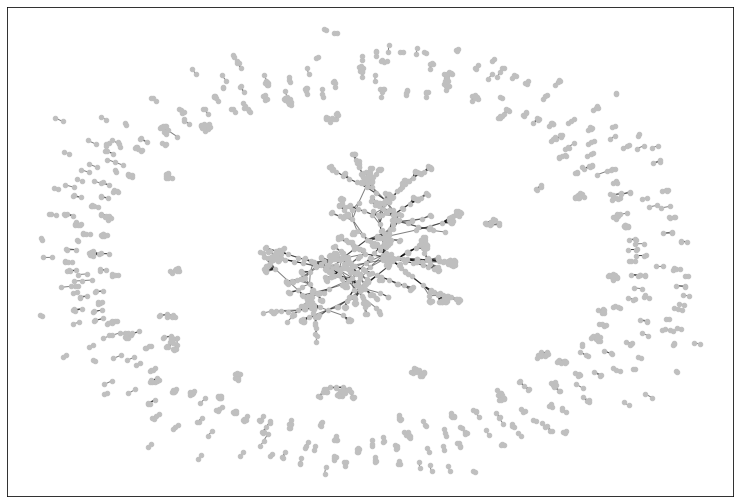

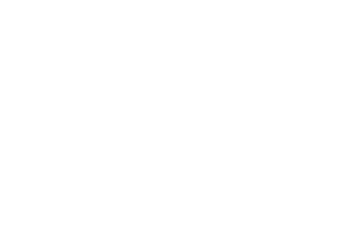

In [5]:
bistaratu_grafoa(G)

## Helburu-funtzioa

In [6]:
import numpy as np
# 50 komunitate ausaz
soluzioa_1 = np.random.randint(50, size=1843)
# 10 komunitate ausaz
soluzioa_2 = np.random.randint(10, size=1843)
print(list(soluzioa_1))
print(list(soluzioa_2))

[24, 4, 26, 38, 17, 46, 19, 23, 4, 24, 18, 4, 0, 28, 46, 22, 15, 43, 26, 27, 31, 35, 37, 0, 1, 22, 8, 37, 25, 6, 26, 29, 1, 2, 1, 42, 2, 13, 37, 37, 33, 44, 39, 38, 20, 9, 7, 27, 6, 32, 43, 36, 49, 10, 2, 16, 18, 24, 32, 14, 39, 14, 12, 15, 12, 40, 6, 44, 35, 7, 42, 10, 15, 35, 1, 10, 27, 12, 24, 30, 15, 37, 48, 27, 24, 7, 34, 49, 48, 49, 31, 36, 22, 17, 33, 48, 3, 46, 27, 21, 2, 40, 20, 43, 1, 49, 45, 47, 9, 47, 42, 32, 28, 36, 6, 11, 42, 23, 42, 38, 23, 45, 6, 10, 46, 16, 21, 8, 22, 16, 6, 0, 16, 9, 6, 45, 40, 27, 41, 26, 37, 13, 2, 0, 42, 31, 13, 32, 17, 6, 37, 9, 40, 17, 31, 18, 28, 6, 34, 4, 39, 4, 8, 28, 3, 35, 33, 43, 20, 16, 29, 15, 43, 40, 41, 31, 12, 4, 37, 23, 10, 11, 43, 39, 1, 5, 32, 13, 42, 33, 13, 6, 16, 16, 18, 44, 14, 35, 28, 24, 20, 1, 46, 20, 15, 34, 33, 23, 38, 15, 42, 42, 7, 5, 29, 38, 3, 22, 47, 22, 35, 48, 23, 0, 18, 24, 23, 3, 24, 1, 40, 2, 9, 2, 39, 41, 44, 26, 34, 24, 12, 8, 42, 35, 8, 19, 19, 37, 15, 4, 20, 28, 1, 10, 33, 3, 15, 17, 29, 28, 4, 28, 16, 22, 49,

In [7]:
import community
from collections import defaultdict

### Helburu-funtzioa
def modularity(G, partition, weight='weight'):
    weights = defaultdict(float)
    degrees = defaultdict(float)
    sum = G.size(weight=weight)
    modularity = 0

    for node in G:
        community = partition[node]
        degrees[community] += G.degree(node, weight=weight)
        for neighbour, data in G[node].items():
            if partition[neighbour] == community:
                if neighbour == node: # 4 nodes have self edges
                    weights[community] += data[weight] * 2
                else:
                    weights[community] += data[weight]

    for community in set(partition.values()):
        modularity += (weights[community] / (2 * sum)) - (degrees[community] / (2 * sum)) ** 2
    return modularity

## Gure inplementazioa
partition1 = dict(zip(G.nodes, soluzioa_1))
partition2 = dict(zip(G.nodes, soluzioa_2))

print("Gure helburu-funtzioa:")
print("1. soluzioaren modularitatea:", modularity(G, partition1))
print("2. soluzioaren modularitatea:", modularity(G, partition2))
print("Community moduluko modularity:")
print("1. soluzioaren modularitatea:", community.modularity(partition1, G))
print("2. soluzioaren modularitatea:", community.modularity(partition2, G))

Gure helburu-funtzioa:
1. soluzioaren modularitatea: -0.0016873155647873282
2. soluzioaren modularitatea: -0.005896124257559905
Community moduluko modularity:
1. soluzioaren modularitatea: -0.0016873155647873282
2. soluzioaren modularitatea: -0.005896124257559905


In [47]:
best_partition = community.best_partition(G)
print("Komunitate kopurua:", max(best_partition.values())+1)
print("Soluzio onenaren modularitatea:", community.modularity(best_partition, G))

Komunitate kopurua: 292
Soluzio onenaren modularitatea: 0.9720745841534514


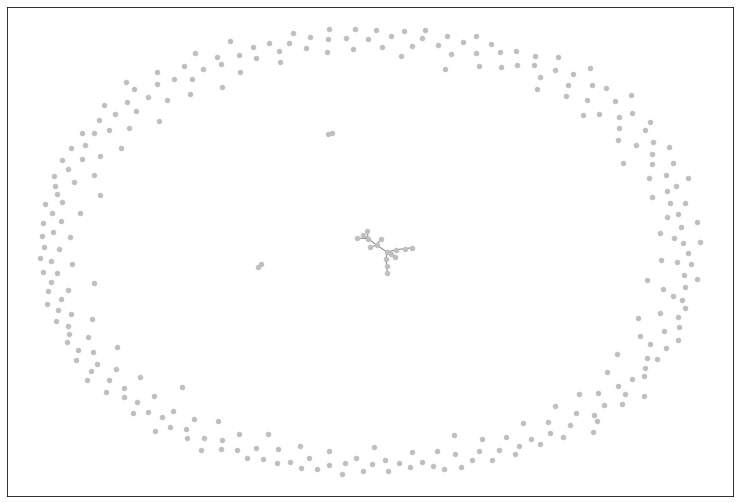

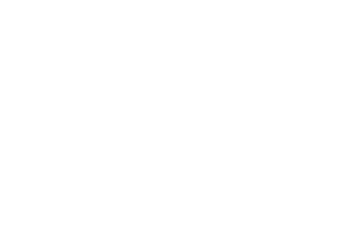

In [49]:
G2 = community.induced_graph(best_partition, G)
bistaratu_grafoa(G2)

## Random Search

In [18]:
def random_search(G, num_solutions, count):
    size = G.number_of_nodes()
    best_solution = list(np.random.randint(count, size=size))
    best_partition = dict(zip(G.nodes, best_solution))
    best_fitness = modularity(G, best_partition)
    for i in range(num_solutions-1):
        solution = list(np.random.randint(count, size=size))
        partition = dict(zip(G.nodes, best_solution))
        fitness = modularity(G, best_partition)
        if fitness > best_fitness:
            best_fitness = fitness
            best_solution = solution
    return (best_fitness, best_solution, num_solutions)

## 1. Local Search

https://www.sciencedirect.com/science/article/pii/S0378437119301402?casa_token=8HvHlfHWvXkAAAAA:uhL8V5PBT2QMlSptsIvYJedrCHGRjeZBuvVx-oBYMwJDERz9n0Olp2nh6YVrcFMo3hlxJytWCWs

https://www.worldscientific.com/doi/abs/10.1142/S0217979220500137

### Swap

In [14]:
def swap(solution, i, j):
    solution[i], solution[j] = solution[j], solution[i]
    return solution

def swap_neighbours(solution):
    neighbours = []
    size = len(solution)
    for i in range(size):
        for j in range(i+1, size):
            neighbours.append(swap(solution[:], i, j))
    return neighbours

def best_first_swap(G, best_solution, best_fitness, evals, max_evals):
    improve = False
    size = len(best_solution)
    for i in range(size):
        for j in range(i+1, size):
            solution = swap(best_solution[:], i, j)
            partition = dict(zip(G.nodes, solution))
            fitness = modularity(G, partition)
            evals += 1
            if fitness > best_fitness:
                improve = True
                return (fitness, solution, evals, improve)
            if evals == max_evals:
                return (best_fitness, best_solution, evals, improve)
    return (best_fitness, best_solution, evals, improve)

def local_search_swap(G, max_evals, count):
    size = G.number_of_nodes()
    best_solution = list(np.random.randint(count, size=size))
    best_partition = dict(zip(G.nodes, best_solution))
    best_fitness = modularity(G, best_partition)
    improve = True
    evals = 1
    while evals < max_evals and improve:
        best_fitness, best_solution, evals, improve = best_first_swap(G, best_solution, best_fitness, evals, max_evals)
        
    return (best_fitness, best_solution, evals)

### Insert

In [15]:
def insert(solution, i, j):
    solution.insert(j, solution.pop(i))
    return solution

def insert_neighbours(solution):
    neighbours = []
    size = len(solution)
    for i in range(size):
        for j in list(range(0, i-1)) + list(range(i+1, size)):
            neighbours.append(insert(solution[:], i, j))
    return neighbours

def best_first_insert(G, best_solution, best_fitness, evals, max_evals):
    improve = False
    size = len(best_solution)
    for i in range(size):
        for j in list(range(0, i-1)) + list(range(i+1, size)):
            solution = insert(best_solution[:], i, j)
            partition = dict(zip(G.nodes, solution))
            fitness = modularity(G, partition)
            evals += 1
            if fitness > best_fitness:
                improve = True
                return (fitness, solution, evals, improve)
            if evals == max_evals:
                return (best_fitness, best_solution, evals, improve)
    return (best_fitness, best_solution, evals, improve)

def local_search_insert(G, max_evals, count):
    size = G.number_of_nodes()
    best_solution = list(np.random.randint(count, size=size))
    best_partition = dict(zip(G.nodes, best_solution))
    best_fitness = modularity(G, best_partition)
    improve = True
    evals = 1
    while evals < max_evals and improve:
        best_fitness, best_solution, evals, improve = best_first_insert(G, best_solution, best_fitness, evals, max_evals)
        
    return (best_fitness, best_solution, evals)

### Hamming

In [16]:
def hamming(solution, i, j):
    solution[i] = j
    return solution

def hamming_neighbours(solution, count):
    neighbours = []
    size = len(solution)
    for i in range(size):
        for j in range(count):
            neighbours.append(hamming(solution[:], i, j))
    return neighbours

def best_first_hamming(G, best_solution, best_fitness, evals, max_evals, count):
    improve = False
    size = len(best_solution)
    for i in range(size):
        for j in range(count):
            solution = hamming(best_solution[:], i, j)
            partition = dict(zip(G.nodes, solution))
            fitness = modularity(G, partition)
            evals += 1
            if fitness > best_fitness:
                improve = True
                return (fitness, solution, evals, improve)
            if evals == max_evals:
                return (best_fitness, best_solution, evals, improve)
    return (best_fitness, best_solution, evals, improve)

def local_search_hamming(G, max_evals, count):
    size = G.number_of_nodes()
    best_solution = list(np.random.randint(count, size=size))
    best_partition = dict(zip(G.nodes, best_solution))
    best_fitness = modularity(G, best_partition)
    improve = True
    evals = 1
    while evals < max_evals and improve:
        best_fitness, best_solution, evals, improve = best_first_hamming(G, best_solution, best_fitness, evals, max_evals, count)
        
    return (best_fitness, best_solution, evals)

## Local Search vs Random Search

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import time as tm

# Egin exekuzioak budget desberdinetarako: 10, 100, 1000, 10000...
def run_search(function, count, budget=5, repetitions=1):
    list_budget = []
    list_fit = []
    list_time = []
    for exp in range(1, budget):
        budget=10**exp
        avg_fit = 0
        avg_time = 0
        for rep in tqdm(range(repetitions), position=0, leave=True):
            start = tm.time()
            (fitness, sol, evals) = function(G, budget, count)
            end = tm.time()
            avg_time += end - start
            avg_fit += fitness
        avg_fit = avg_fit/repetitions
        avg_time = avg_time/repetitions
        print()
        print("Budget:", budget, " Average fitness:", avg_fit, " Average time:", avg_time)
        list_budget.append(budget)
        list_fit.append(avg_fit)
        list_time.append(avg_time)
    return list_budget, list_fit, list_time

In [55]:
list_budget, list_fit_ls_swap, list_time_ls_swap = run_search(local_search_swap, 50, budget=6)

  0%|          | 0/1 [00:00<?, ?it/s]


Budget: 10  Average fitness: -0.0005931266449406192  Average time: 0.17947077751159668


  0%|          | 0/1 [00:00<?, ?it/s]


Budget: 100  Average fitness: 0.004445977624721273  Average time: 1.7810559272766113


  0%|          | 0/1 [00:00<?, ?it/s]


Budget: 1000  Average fitness: 0.0006367683436520614  Average time: 17.597049474716187


  0%|          | 0/1 [00:00<?, ?it/s]


Budget: 10000  Average fitness: 0.02821738207996663  Average time: 178.08377027511597


100%|██████████| 1/1 [29:15<00:00, 1755.93s/it]


Budget: 100000  Average fitness: 0.11388027496558517  Average time: 1755.92822265625


In [53]:
list_budget, list_fit_ls_swap, list_time_ls_swap = run_search(local_search_swap, 250)

  0%|          | 0/1 [00:00<?, ?it/s]


Budget: 10  Average fitness: 0.0008383455906029447  Average time: 0.19142603874206543


  0%|          | 0/1 [00:00<?, ?it/s]


Budget: 100  Average fitness: -0.0012576001119319687  Average time: 1.8512766361236572


  0%|          | 0/1 [00:00<?, ?it/s]


Budget: 1000  Average fitness: 0.002272964278207167  Average time: 18.25823473930359


100%|██████████| 1/1 [03:00<00:00, 180.39s/it]


Budget: 10000  Average fitness: 0.010148370333975053  Average time: 180.3850793838501


In [54]:
list_budget, list_fit_ls_swap, list_time_ls_swap = run_search(local_search_swap, 10)

  0%|          | 0/1 [00:00<?, ?it/s]


Budget: 10  Average fitness: -0.00821023759063825  Average time: 0.20637965202331543


  0%|          | 0/1 [00:00<?, ?it/s]


Budget: 100  Average fitness: 0.0045737562687949455  Average time: 1.8360650539398193


  0%|          | 0/1 [00:00<?, ?it/s]


Budget: 1000  Average fitness: 0.021733933725422122  Average time: 17.81641674041748


100%|██████████| 1/1 [02:59<00:00, 179.13s/it]


Budget: 10000  Average fitness: 0.05694318177731881  Average time: 179.12252187728882


In [33]:
list_budget, list_fit_ls_swap, list_time_ls_swap = run_search(local_search_swap, 50)

  0%|          | 0/2 [00:00<?, ?it/s]


Budget: 10  Average fitness: 0.0005455620969068004  Average time: 0.18771016597747803


  0%|          | 0/2 [00:00<?, ?it/s]


Budget: 100  Average fitness: 0.0019381531748436818  Average time: 1.7739143371582031


  0%|          | 0/2 [00:00<?, ?it/s]


Budget: 1000  Average fitness: 0.006557246957421721  Average time: 17.53154480457306


100%|██████████| 2/2 [05:47<00:00, 173.79s/it]


Budget: 10000  Average fitness: 0.028085353682460394  Average time: 173.78380489349365


In [34]:
list_budget, list_fit_ls_ins, list_time_ls_ins = run_search(local_search_insert, 50)

  0%|          | 0/2 [00:00<?, ?it/s]


Budget: 10  Average fitness: 0.001304286105169629  Average time: 0.18380522727966309


  0%|          | 0/2 [00:00<?, ?it/s]


Budget: 100  Average fitness: 0.0016147837153371303  Average time: 1.7246047258377075


  0%|          | 0/2 [00:00<?, ?it/s]


Budget: 1000  Average fitness: 0.0011226091459270524  Average time: 17.628015398979187


100%|██████████| 2/2 [05:55<00:00, 177.72s/it]


Budget: 10000  Average fitness: 0.005104096893070645  Average time: 177.7169154882431


In [35]:
list_budget, list_fit_ls_ham, list_time_ls_ham = run_search(local_search_hamming, 50)

  0%|          | 0/2 [00:00<?, ?it/s]


Budget: 10  Average fitness: 0.003894572116844682  Average time: 0.18129825592041016


  0%|          | 0/2 [00:00<?, ?it/s]


Budget: 100  Average fitness: -0.0015972330509208738  Average time: 1.8198264837265015


  0%|          | 0/2 [00:00<?, ?it/s]


Budget: 1000  Average fitness: 0.002721762758495338  Average time: 17.767357230186462


100%|██████████| 2/2 [05:59<00:00, 179.65s/it]


Budget: 10000  Average fitness: 0.005676362969479251  Average time: 179.6505230665207


In [36]:
list_budget, list_fit_rs, list_time_rs = run_search(random_search, 50)

  0%|          | 0/2 [00:00<?, ?it/s]


Budget: 10  Average fitness: 0.004418047754806225  Average time: 0.18448638916015625


  0%|          | 0/2 [00:00<?, ?it/s]


Budget: 100  Average fitness: 0.0020903474696477697  Average time: 1.8131505250930786


  0%|          | 0/2 [00:00<?, ?it/s]


Budget: 1000  Average fitness: -0.0021663322437619347  Average time: 18.06502664089203


100%|██████████| 2/2 [06:06<00:00, 183.48s/it]


Budget: 10000  Average fitness: 0.002816973580590524  Average time: 183.47675490379333


       n  Local Swap  Local Insert  Local Hamming  Random Search
0     10    0.000546      0.001304       0.003895       0.004418
1    100    0.001938      0.001615      -0.001597       0.002090
2   1000    0.006557      0.001123       0.002722      -0.002166
3  10000    0.028085      0.005104       0.005676       0.002817



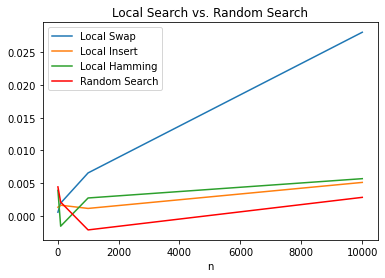

In [39]:
# Datuak gordetzeko egitura
datuak = pd.DataFrame({"n":list_budget,"Local Swap":list_fit_ls_swap,"Local Insert":list_fit_ls_ins,"Local Hamming":list_fit_ls_ham,"Random Search":list_fit_rs}) 
print(datuak)
print()

#Irudikatu emaitzak plot batean.
ax = plt.gca()
datuak.plot(kind='line',x='n',y='Local Swap',ax=ax)
datuak.plot(kind='line',x='n',y='Local Insert',ax=ax)
datuak.plot(kind='line',x='n',y='Local Hamming',ax=ax)
datuak.plot(kind='line',x='n',y='Random Search', color='red', ax=ax,title='Local Search vs. Random Search')
plt.show()

## 2. EDA

https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=EDA+community+detection&btnG=

http://webpages.iust.ac.ir/mozayani/Papers-pdf/ieee79189c24-5f04-20150417114429.pdf

https://ieeexplore.ieee.org/abstract/document/8711535?casa_token=mRcZrc_nHyAAAAAA:XFkC-HfhuOJ7wePqpFhDDcRQP9js3AkGEQ-yqYk9_DVWkLn3rCe1CLZdy8QH9-i7GWghAssK8PQ

## ACO

https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=community+detection+aco&btnG=

https://www.sciencedirect.com/science/article/pii/S0960077920302861?casa_token=BjEGEcPVJcgAAAAA:jHzDidaqIu2bhA9l56xgjr_vq4fWfzZ4VYrV5dHEHHjQCHvADJkmbjA3784xg2xSN3iTgSG2xUc